# 2차 Submission
전처리
- Min Max Scaling

PyCaret 결과 바탕

- model1 : 정적 동적 구분 () - Extra Trees Classifier
- model2-1 : 정적으로 구분한 것을 세부 Class 분류 - LGBM
- model2-1 : 동적으로 구분한 것을 세부 Class 분류 - LGBM

# 데이터 확인

In [41]:
# library import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
import tensorflow as tf
import numpy as np
import random
import os

def my_seed_everywhere(seed: int = 42):
    random.seed(seed) # random
    np.random.seed(seed) # np
    os.environ["PYTHONHASHSEED"] = str(seed) # os
    tf.random.set_seed(seed) # tensorflow

my_seed = 42
my_seed_everywhere(my_seed)

In [43]:
# data 확인
train_path = 'data/train_dataset.csv'
test_path = 'data/test_dataset.csv'

train_data = pd.read_csv(train_path)
x_test = pd.read_csv(test_path)

train_data.shape, x_test.shape

((5881, 52), (1471, 50))

In [44]:
from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler()
temp_x = train_data.drop(['Activity', 'Activity_dynamic'], axis=1)
temp_x = mm_scaler.fit_transform(temp_x)

temp_x = pd.DataFrame(temp_x, columns=[list(train_data)[:-2]])
temp_y = train_data[['Activity', 'Activity_dynamic']]

train_data = pd.concat([temp_x, temp_y], axis=1, join='outer')

In [45]:
train_data

,"(tBodyAcc-mean()-Z,)","(tBodyAcc-arCoeff()-X,2,)","(tBodyAcc-arCoeff()-Y,1,)","(tBodyAccJerk-mean()-X,)","(tBodyAccJerk-mean()-Y,)","(tBodyAccJerk-arCoeff()-X,2,)","(tBodyAccJerk-arCoeff()-Y,1,)","(tBodyAccJerk-arCoeff()-Y,3,)","(tBodyAccJerk-arCoeff()-Z,1,)","(tBodyGyro-arCoeff()-Z,3,)",...,"(fBodyGyro-min()-Y,)","(fBodyGyro-bandsEnergy()-49,64.1,)","(fBodyBodyAccJerkMag-iqr(),)","(fBodyBodyAccJerkMag-entropy(),)","(fBodyBodyGyroMag-mean(),)","(fBodyBodyGyroJerkMag-min(),)","(fBodyBodyGyroJerkMag-meanFreq(),)","(angle(tBodyAccMean,gravity),)",Activity,Activity_dynamic
0,0.448319,0.447229,0.445396,0.534292,0.492843,0.614582,0.463167,0.568554,0.489135,0.668398,...,0.001889,0.000015,0.007181,0.000000,0.012283,0.003018,0.488133,0.472577,STANDING,4
1,0.450918,0.469018,0.732382,0.537974,0.502228,0.579566,0.700956,0.772599,0.525651,0.745015,...,0.004077,0.000030,0.005260,0.000000,0.010733,0.002633,0.375973,0.462253,LAYING,3
2,0.445641,0.379275,0.650582,0.539765,0.507252,0.569840,0.631778,0.798220,0.682830,0.554287,...,0.000014,0.000012,0.003983,0.000000,0.004024,0.003900,0.708258,0.494210,STANDING,4
3,0.424823,0.778998,0.307941,0.345245,0.399354,0.723856,0.313690,0.658070,0.384665,0.120890,...,0.068815,0.015335,0.306143,0.661630,0.260205,0.055387,0.531583,0.365002,WALKING,0
4,0.545615,0.448901,0.194603,0.792106,0.366592,0.385231,0.185574,0.559455,0.394503,0.329348,...,0.022235,0.004854,0.389366,0.723193,0.283317,0.094777,0.497705,0.471641,WALKING_DOWNSTAIRS,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5876,0.434013,0.465618,0.500220,0.541196,0.495633,0.605125,0.520506,0.599205,0.518822,0.701988,...,0.001122,0.000016,0.006037,0.000000,0.009441,0.008118,0.532643,0.476425,SITTING,5
5877,0.447413,0.637774,0.404305,0.445851,0.525288,0.599053,0.343252,0.476330,0.515924,0.352664,...,0.027155,0.008789,0.219126,0.620684,0.292391,0.077277,0.675157,0.859210,WALKING_UPSTAIRS,1
5878,0.446280,0.483090,0.703809,0.535371,0.505674,0.626798,0.629726,0.764954,0.616595,0.566344,...,0.001014,0.000040,0.004909,0.000000,0.004274,0.005484,0.694492,0.524518,LAYING,3
5879,0.439500,0.849437,0.196991,0.457078,0.480402,0.768843,0.185966,0.683271,0.499931,0.368673,...,0.173878,0.029745,0.267051,0.661701,0.247838,0.066003,0.521662,0.626061,WALKING_UPSTAIRS,1


In [46]:
dict(train_data.groupby(['Activity', 'Activity_dynamic']).count().index)

{'LAYING': 3,
 'SITTING': 5,
 'STANDING': 4,
 'WALKING': 0,
 'WALKING_DOWNSTAIRS': 2,
 'WALKING_UPSTAIRS': 1}

- Dynamic : 0, 1, 2 (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS)
- Static : 3, 4, 5 (LAYING, STANDING, SITTING)

In [47]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5881 entries, 0 to 5880
Data columns (total 52 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   (tBodyAcc-mean()-Z,)                   5881 non-null   float64
 1   (tBodyAcc-arCoeff()-X,2,)              5881 non-null   float64
 2   (tBodyAcc-arCoeff()-Y,1,)              5881 non-null   float64
 3   (tBodyAccJerk-mean()-X,)               5881 non-null   float64
 4   (tBodyAccJerk-mean()-Y,)               5881 non-null   float64
 5   (tBodyAccJerk-arCoeff()-X,2,)          5881 non-null   float64
 6   (tBodyAccJerk-arCoeff()-Y,1,)          5881 non-null   float64
 7   (tBodyAccJerk-arCoeff()-Y,3,)          5881 non-null   float64
 8   (tBodyAccJerk-arCoeff()-Z,1,)          5881 non-null   float64
 9   (tBodyGyro-arCoeff()-Z,3,)             5881 non-null   float64
 10  (tBodyGyroJerk-mean()-Y,)              5881 non-null   float64
 11  (tBo

In [48]:
# 결측치는 없음
train_data.isnull().sum().sum()

0

In [49]:
temp = train_data.drop(['Activity', 'Activity_dynamic'], axis=1)
temp.describe()

,"(tBodyAcc-mean()-Z,)","(tBodyAcc-arCoeff()-X,2,)","(tBodyAcc-arCoeff()-Y,1,)","(tBodyAccJerk-mean()-X,)","(tBodyAccJerk-mean()-Y,)","(tBodyAccJerk-arCoeff()-X,2,)","(tBodyAccJerk-arCoeff()-Y,1,)","(tBodyAccJerk-arCoeff()-Y,3,)","(tBodyAccJerk-arCoeff()-Z,1,)","(tBodyGyro-arCoeff()-Z,3,)",...,"(fBodyAccJerk-bandsEnergy()-41,48.2,)","(fBodyAccJerk-bandsEnergy()-49,64.2,)","(fBodyGyro-min()-Y,)","(fBodyGyro-bandsEnergy()-49,64.1,)","(fBodyBodyAccJerkMag-iqr(),)","(fBodyBodyAccJerkMag-entropy(),)","(fBodyBodyGyroMag-mean(),)","(fBodyBodyGyroJerkMag-min(),)","(fBodyBodyGyroJerkMag-meanFreq(),)","(angle(tBodyAccMean,gravity),)"
count,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,...,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000
mean,0.445302,0.549642,0.486995,0.540150,0.504088,0.596383,0.465111,0.598993,0.503638,0.484260,...,0.031074,0.035488,0.056127,0.022832,0.161209,0.328278,0.153425,0.064533,0.571358,0.498388
std,0.029186,0.127291,0.128560,0.090797,0.081056,0.099225,0.135519,0.123236,0.143151,0.139160,...,0.063359,0.070521,0.088817,0.055502,0.185434,0.335165,0.166809,0.097154,0.130293,0.171878
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.439475,0.454230,0.389460,0.532326,0.491932,0.533990,0.361119,0.519261,0.396143,0.386334,...,0.000207,0.000255,0.002822,0.000029,0.005275,0.000000,0.007975,0.003001,0.493674,0.432170
50%,0.445610,0.532824,0.479716,0.538005,0.505386,0.598533,0.458657,0.604008,0.515485,0.494535,...,0.000910,0.001092,0.014078,0.000843,0.025589,0.138179,0.058788,0.012356,0.574983,0.499276
75%,0.450918,0.639540,0.585024,0.546094,0.516232,0.658719,0.573614,0.685399,0.616141,0.587638,...,0.038213,0.042828,0.077809,0.022728,0.313094,0.674021,0.278998,0.096598,0.656062,0.572486
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: >

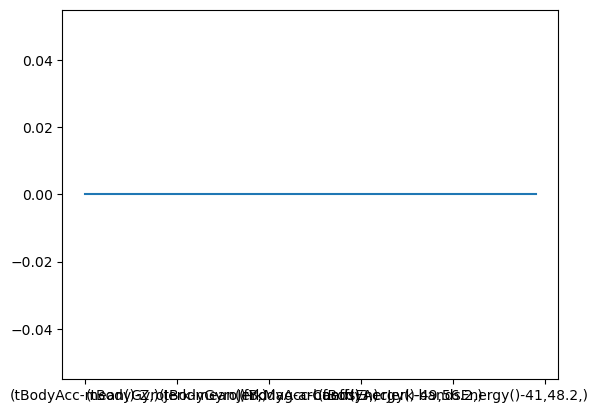

In [50]:
temp.describe().loc["min"].plot()

<Axes: >

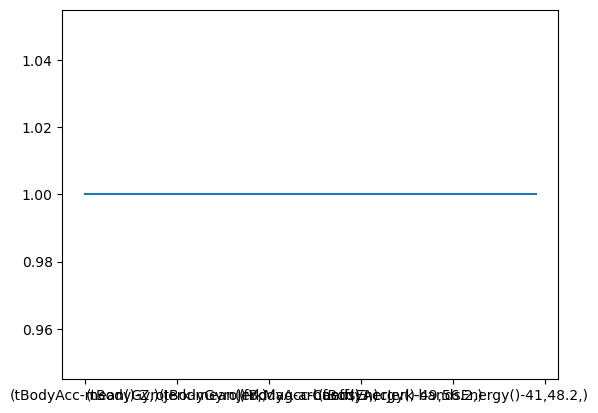

In [51]:
temp.describe().loc["max"].plot()

In [52]:
# x, y 분리
x = train_data.drop(['Activity', 'Activity_dynamic'], axis=1).values
y = train_data['Activity_dynamic'].values

## Target 분포 확인

In [53]:
train_data['Activity'].value_counts()

LAYING                1115
STANDING              1087
SITTING               1032
WALKING                998
WALKING_UPSTAIRS       858
WALKING_DOWNSTAIRS     791
Name: Activity, dtype: int64

<Axes: >

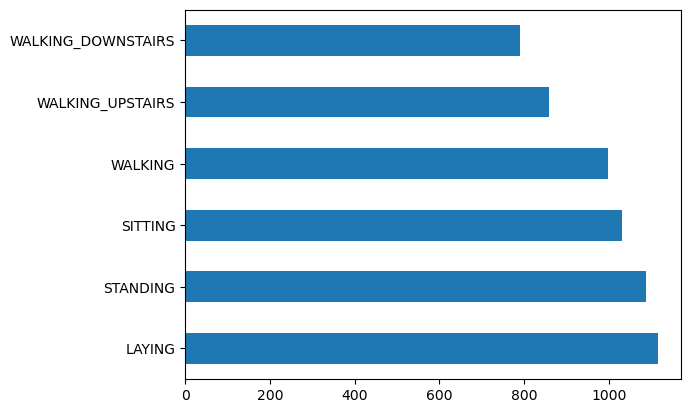

In [54]:
train_data['Activity'].value_counts().plot(kind='barh')

- 분포가 살짝 불균형 함을 확인 -> SMOTE, BorderLineSMOTE 등을 사용해보자

# 모델링

In [55]:
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score

## is_dynamic 분류
- PyCaret 결과 : Extra Trees Classifier가 가장 좋았음

In [56]:
train_data['is_dynamic'] = np.where(train_data['Activity_dynamic'] < 3, 1, 0)
train_data.groupby(['Activity', 'is_dynamic']).count().index

MultiIndex([(            'LAYING', 0),
            (           'SITTING', 0),
            (          'STANDING', 0),
            (           'WALKING', 1),
            ('WALKING_DOWNSTAIRS', 1),
            (  'WALKING_UPSTAIRS', 1)],
           names=['Activity', 'is_dynamic'])

In [57]:
y_is_dy = train_data['is_dynamic'].values

In [58]:
from sklearn.ensemble import ExtraTreesClassifier

my_seed_everywhere(42)
model = ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=42, verbose=0, warm_start=False)
# 검증하기
cv_score = cross_val_score(model, x, y_is_dy, cv=10)

# 확인
print(cv_score)
print('평균:', cv_score.mean())
print('표준편차:', cv_score.std())

[1.         0.99659864 1.         1.         1.         0.99829932
 1.         0.99829932 1.         1.        ]
평균: 0.9993197278911564
표준편차: 0.0011281036701889027


In [59]:
# model1은 is_dynamic 분류 모델
my_seed_everywhere(42)
model1 = ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=42, verbose=0, warm_start=False)
model1.fit(x, y_is_dy)

ExtraTreesClassifier(n_jobs=-1, random_state=42)

## 정적 Class 분류
- LGBM이 성능이 좋았음.
- LGBM을 사용할 때는, label 값이 0부터 시작해야함.
- 따라서 정적 class의 경우 3~5로 존재하는 것을 -3을 해서 0~1으로 바꿔줘야함
- 그러므로 결과를 낼때 +3 을 해줘야함

In [60]:
static_data = train_data[train_data['is_dynamic'] == 0].reset_index(drop=True)
x_static = static_data.drop(columns=['Activity', 'Activity_dynamic', 'is_dynamic']).values
y_static = static_data['Activity_dynamic'].values

In [61]:
from lightgbm import LGBMClassifier
my_seed_everywhere(42)
model = LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
# 검증하기
cv_score = cross_val_score(model, x_static, y_static-3, cv=10)

# 확인
print(cv_score)
print('평균:', cv_score.mean())
print('표준편차:', cv_score.std())

[0.72839506 0.72839506 0.69444444 0.69135802 0.71517028 0.71826625
 0.6996904  0.68421053 0.6873065  0.70588235]
평균: 0.7053118908382066
표준편차: 0.01563607638261874


In [62]:
# model2_1은 정적 Class 분류
my_seed_everywhere(42)
model2_1 = LGBMClassifier(random_state=42)

model2_1.fit(x_static, y_static-3)

LGBMClassifier(random_state=42)

## 동적 Class 분류
- 마찬가지로 LGBM

In [63]:
dynamic_data = train_data[train_data['is_dynamic'] == 1].reset_index(drop=True)
x_dynamic = dynamic_data.drop(columns=['Activity', 'Activity_dynamic', 'is_dynamic']).values
y_dynamic = dynamic_data['Activity_dynamic'].values

In [64]:
my_seed_everywhere(42)
model = LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
# 검증하기
cv_score = cross_val_score(model, x_dynamic, y_dynamic, cv=10)

# 확인
print(cv_score)
print('평균:', cv_score.mean())
print('표준편차:', cv_score.std())

[0.87169811 0.81132075 0.82264151 0.84528302 0.85660377 0.89433962
 0.86037736 0.87878788 0.86742424 0.85227273]
평균: 0.8560748999428244
표준편차: 0.023713704825574927


In [65]:
# model2_2 는 동적 Class 분류
my_seed_everywhere(42)
model2_2 = LGBMClassifier(random_state=42)
model2_2.fit(x_dynamic, y_dynamic)

LGBMClassifier(random_state=42)

In [66]:
model2_1.predict( x_test ) + 3

array([3, 3, 3, ..., 3, 3, 3], dtype=int64)

In [67]:
def my_model_predict(x):
    """
    params:
        x : DataFrame. Features
    ret:
        y_pred : numpy array

    model1 : 정적 동적 구분 
    model2-1 : 정적으로 구분한 것을 세부 Class 분류 
    model2-1 : 동적으로 구분한 것을 세부 Class 분류 
    """
    # 전처리 수행
    x = pd.DataFrame(mm_scaler.transform(x), columns=list(x))
    
    # 정적, 동적 예측 결과 저장
    x['is_dynamic'] = model1.predict(x.values)

    # 정적과 동적 예측 결과에 따라 나누기
    # reset_index로 원래의 index 를 column으로 빼서 나중에 concat 후 사용
    temp_static = x[x['is_dynamic'] == 0].reset_index()
    temp_dynamic = x[x['is_dynamic'] == 1].reset_index()

    # 정적, 동적 별로 각 Class 예측
    # 정적 Class 는 결과값 + 3!!
    temp_static['label'] = model2_1.predict( temp_static.drop(['is_dynamic', 'index'], axis=1) ) + 3
    temp_dynamic['label'] = model2_2.predict( temp_dynamic.drop(['is_dynamic', 'index'], axis=1) )

    # 각 예측 결과를 합치고, index로 정렬
    result_df = pd.concat([temp_static, temp_dynamic], axis=0).sort_values(by='index').set_index('index')

    # y_pred 뽑기
    y_pred = result_df['label'].values
    
    x.drop('is_dynamic', axis=1, inplace=True)

    return y_pred

In [68]:
y_pred = my_model_predict(x_test)
y_pred

array([5, 4, 0, ..., 2, 3, 2], dtype=int64)

In [69]:
result = pd.DataFrame(y_pred, columns=['Activity']).reset_index(names='ID')
result

,ID,Activity
0,0,5
1,1,4
2,2,0
3,3,5
4,4,4
...,...,...
1466,1466,3
1467,1467,5
1468,1468,2
1469,1469,3


In [70]:
result.to_csv("submssion_2.csv", index=False)

In [71]:
temp = pd.read_csv('submssion_1.csv')

In [72]:
(temp['Activity'] != result['Activity']).sum()

138